In [1]:
'''
Load packages for data manipulation
'''
import numpy as np
import pandas as pd

'''
Load Packages for data visualization
'''
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import plotly.tools as tls
init_notebook_mode(connected=True)

'''
Load packages for model building
'''
from sklearn.model_selection import train_test_split
import scipy.spatial.distance as metric
from math import sqrt, floor
import sklearn.preprocessing

'''
Load some used packages, will be used for data sorting and math opeartions 
'''
import operator
import math

'''
Suppress warnings
'''
import warnings
warnings.filterwarnings("ignore")

# Data 

Please, download the data to your working folder.On the webpage you can find its description. 

https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
'''
Load data from disk
'''
iris = pd.read_csv('iris.data',header=None, names=['sl', 'sw', 'pl', 'pw', 'target'])

In [3]:
iris.sample(frac=1).head()

,sl,sw,pl,pw,target
76,6.8,2.8,4.8,1.4,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica


## Explore the data

### You are free to use all descriptive and visualization methods we have discussed so far. Dig deeper and see what you can find :)

In [4]:
'''
At first let's see the dimension of our dataset
'''
iris.shape

(150, 5)

In [5]:
'''
Check if there is any missing values.
'''
print(iris.info())
print('\n')
print(iris.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl        150 non-null float64
sw        150 non-null float64
pl        150 non-null float64
pw        150 non-null float64
target    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


sl        0
sw        0
pl        0
pw        0
target    0
dtype: int64


In [6]:
'''
Show statistical measures, such as count mean median and others
'''
iris.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


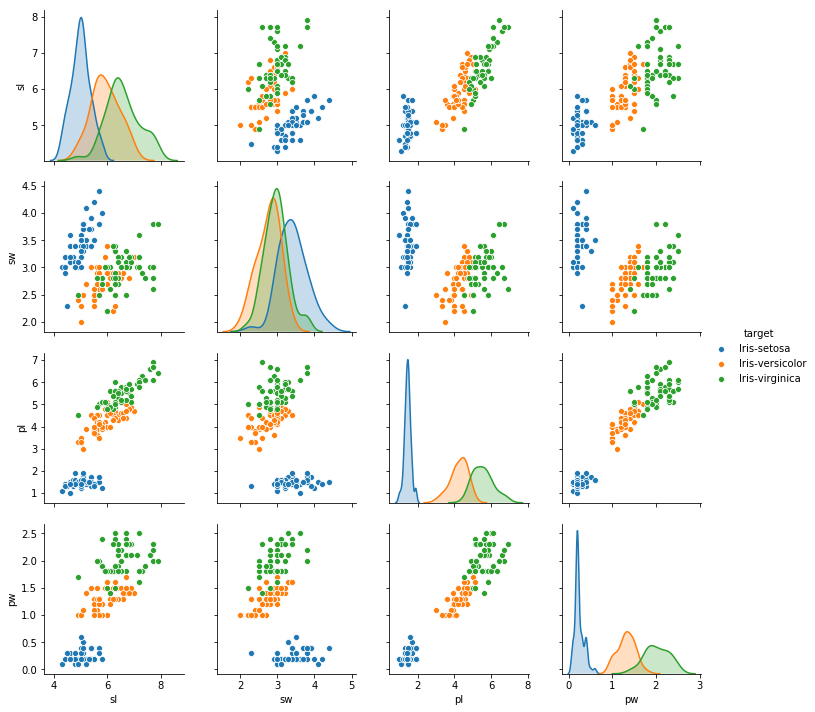

In [7]:
'''
scatter plot between features
'''
sns.pairplot(iris, hue='target');

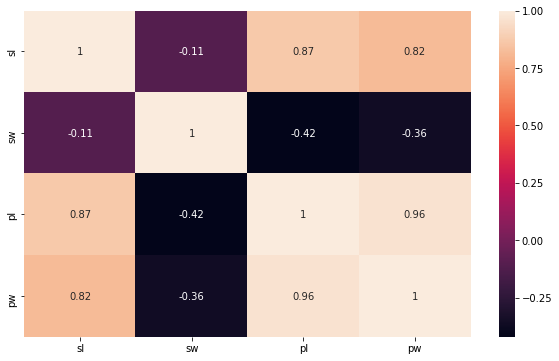

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(),annot=True)
plt.show()


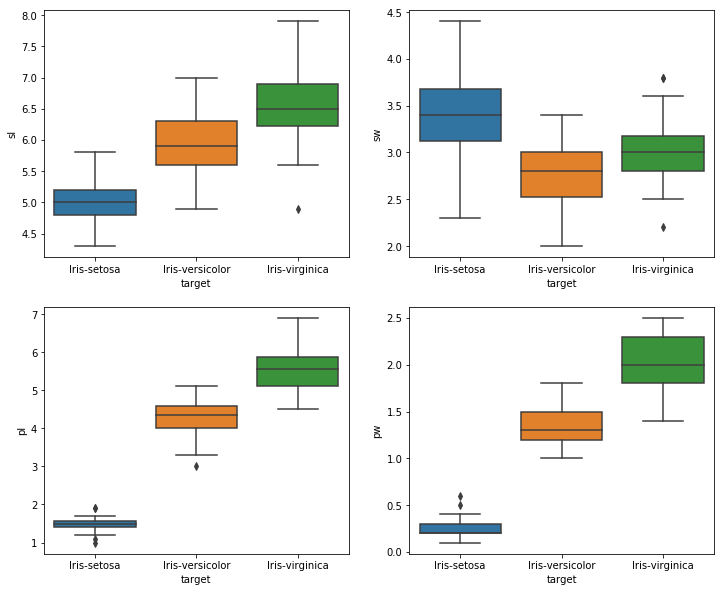

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='target',y='sl',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='target',y='sw',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='target',y='pl',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='target',y='pw',data=iris)

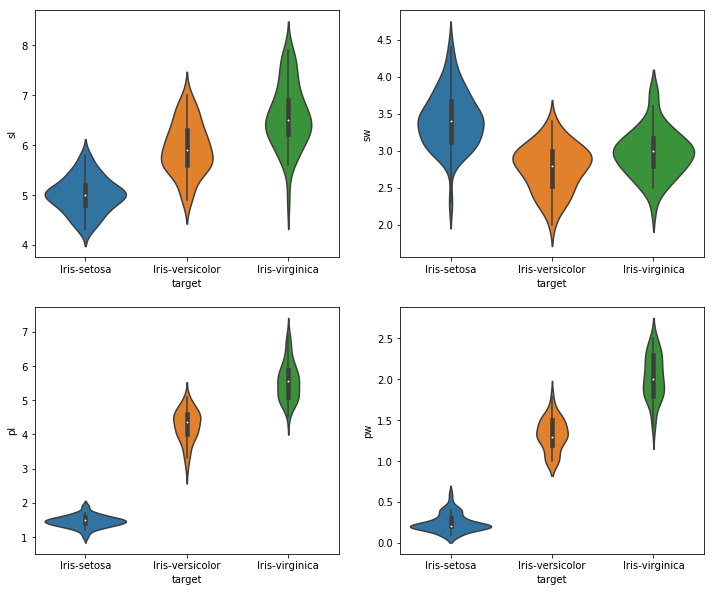

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='sl',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='sw',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='pl',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='pw',data=iris);

In [11]:
'''
Show the relationship between <sepal length , sepal width and petal length>
'''

data = []
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    trace = go.Scatter3d(x = iris[iris["target"] == i].iloc[:, 0],
                         y = iris[iris["target"] == i].iloc[:, 1],
                         z = iris[iris["target"] == i].iloc[:, 2],
                         mode = 'markers',
                         name = "class_{}".format(i),
                         marker = dict(size = 3))
    data.append(trace)
    layout=dict(
        title='Scatter plot between sepal length, sepal width and petal length'
    )
figure = dict(data=data, layout = layout)
iplot(figure)

In [12]:
data = []
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    trace = go.Scatter3d(x = iris[iris["target"] == i].iloc[:, 0],
                         y = iris[iris["target"] == i].iloc[:, 2],
                         z = iris[iris["target"] == i].iloc[:, 3],
                         mode = 'markers',
                         name = "class_{}".format(i),
                         marker = dict(size = 3))
    data.append(trace)
    layout=dict(
        title='Scatter plot between sepal length, petal length and petal width'
    )
figure = dict(data=data, layout = layout)
iplot(figure)

In [13]:
data = []
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    trace = go.Scatter3d(x = iris[iris["target"] == i].iloc[:, 0],
                         y = iris[iris["target"] == i].iloc[:, 1],
                         z = iris[iris["target"] == i].iloc[:, 3],
                         mode = 'markers',
                         name = "class_{}".format(i),
                         marker = dict(size = 3))
    data.append(trace)
    layout=dict(
        title='Scatter plot between sepal length, sepal width and petal width'
    )
figure = dict(data=data, layout = layout)
iplot(figure)

In [14]:
data = []
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    trace = go.Scatter3d(x = iris[iris["target"] == i].iloc[:, 1],
                         y = iris[iris["target"] == i].iloc[:, 2],
                         z = iris[iris["target"] == i].iloc[:, 3],
                         mode = 'markers',
                         name = "class_{}".format(i),
                         marker = dict(size = 3))
    data.append(trace)
    layout=dict(
        title='Scatter plot between sepal width, petal length and petal width'
    )
figure = dict(data=data, layout = layout)
iplot(figure)

## Clustering

### Implement the K-means algorithm

In [15]:
def _get_mean(sums, step):
    """
    Vectorizable ufunc for getting means of summed shard columns.
    
    Parameters
    ----------
    sums : float
        The summed shard columns.
    step : int
        The number of instances per shard.
    Returns
    -------
    sums/step (means) : numpy array
        The means of the shard columns.
    """

    return sums/step

In [16]:
def initialize_sharding(ds, k):
    """
    Create cluster centroids using deterministic naive sharding algorithm.

    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    """

    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def initialize_random(ds, k):

    '''
    Create random cluster centroids

    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters

    Returns:
    --------
    ndarray
        k centroids as numpy ndarray
    '''

    # Number of attributes in dataset
    n = np.shape(ds)[1]

    # The centroids
    centroids = np.mat(np.zeros((k,n)))

    # Create random centroids (get min, max attribute values, randomize in that range)
    for j in range(n):
        min_j = min(ds[:,j])
        range_j = float(max(ds[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)

    # Return centroids as numpy array
    return centroids

def euclidean_dist(A, B):

    '''
    Calculate Euclidean distance between 2 n-dimension points

    Parameters:
    -----------
    A: ndarray
        vector of point coordinates to compare
    B: ndarray
        vector of point coordinates to compare
    Returns:
    --------
    float
        calculated Euclidean distance of the 2 vectors
    '''
    
    return metric.euclidean(A, B)


In [17]:
def cluster(ds, k, initializer = 'initialize_sharding'):

    '''
    The k-means clustering algorithm
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    initializer: string
        How to initialize centroids
        
    Returns:
    --------
    ndarray
        Resulting centroids after clustering
    ndarray
        Cluster assignments after clustering
    int
        Number of iterations required by clustering algorithm
    ndarray
        Original centroids
    '''

    # Number of rows in dataset
    m = np.shape(ds)[0]
    n = np.shape(ds)[1]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))
        
    # Initialize centroids
    if initializer == 'initialize_sharding':
        cents = initialize_sharding(ds, k)
    elif initializer == 'initialize_random':
        cents = initialize_random(ds, k)
    
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], ds[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

            
        points_matrix = np.mat(np.zeros((k, n)))
        # Update centroid location
        for cent in range(k):
            points = ds[np.nonzero(cluster_assignments[:,0].A == cent)[0]]
            points_matrix[cent,:] = np.mean(points, axis=0)
        for cent in range(k):
            if ~np.isnan(points_matrix[cent, :].A).any():
                cents[cent,:] = points_matrix[cent, :].A

        # Count iterations
        num_iter += 1

    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

### Choose the best-K, using the elbow method 

In [18]:
iris_ds = iris.iloc[:, 0:4].values
minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
iris_ds = minmax_scaler.fit_transform(iris_ds)

# K = 1 to 18,for every k value we calculate distortion,then we plot the line graph between K and Distortion
distortions = []
K = list(range(1,18))

for k in K:
    centroids, cluster_assignments, iters, orig_centroids = cluster(iris_ds, k)
    distortions.append(np.sum(cluster_assignments[:, 1]))
    
# plt.plot(K,distortions,'bx-');
trace = go.Scatter(x = K,y = distortions, mode = 'lines',
                   marker = dict(size = 10,color="rgba(152,0,0,0.5)")
                  )

data = [trace]
layout=dict(
        title='The changing of distortion depending on K',
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text='K',
                font=dict(
                    family='Courier New, monospace',
                    size=18,
                    color='#7f7f7f'
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text='distortion',
                font=dict(
                    family='Courier New, monospace',
                    size=18,
                    color='#7f7f7f'
                )
            )
        )
    )
figure = dict(data=data, layout=layout)
iplot(figure)

### See whether the clustering algorithm really captures the underlying data distribution by assigning labels to each cluster and comparing with ground truth

In [19]:
centroids, cluster_assignments, iters, orig_centroids = cluster(iris_ds, 3)
iris['cluster'] = cluster_assignments[:,0]
iris['target'] = pd.factorize(iris.target)[0]
iris.cluster = iris.cluster.astype(int)

In [20]:
iris.groupby(['target', 'cluster']).count()[['sl']]

sl
target cluster    
0      0        50
1      1        47
       2         3
2      1        14
       2        36

In case of deterministic naive sharding initialization (for centroids), the accuracy is: 50 + 47 + 36 = 133 or 133/150 = 0.887

In [21]:
centroids, cluster_assignments, iters, orig_centroids = cluster(iris_ds, 3, initializer = 'initialize_random')
iris['cluster'] = cluster_assignments[:,0]
iris['target'] = pd.factorize(iris.target)[0]
iris.cluster = iris.cluster.astype(int)

In [22]:
iris.groupby(['target', 'cluster']).count()[['sl']]

sl
target cluster    
0      1        50
1      0        40
       2        10
2      0         8
       2        42

And for random initialization, the accuracy is: 50 + 40 + 42 = 132 or 133/150 = 0.88

# Decision tree classifier for iris flowers classification (Report)

In [23]:
'''
Load packages for dataset splitting and Model building
'''
from sklearn.model_selection import train_test_split
from sklearn import tree

'''
Accuracy metric
'''
from sklearn.metrics import accuracy_score, \
                            confusion_matrix

'''
Model building
'''
classifier=tree.DecisionTreeClassifier()

In [24]:
'''
Load data from disk
'''
iris = pd.read_csv('iris.data',header=None, names=['sl', 'sw', 'pl', 'pw', 'target'])
x = iris.drop(columns = ['target'])
y = iris['target']

In [25]:
'''
Train and test data splitting
'''
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.3, random_state = 222, shuffle=True)

In [26]:
'''
Fit the model on training dataset
'''

classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
'''
Make a prediction
'''
predictions=classifier.predict(x_test)

In [28]:
cnf_matrix = confusion_matrix(y_test, predictions)

In [29]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [30]:
print('True positive rate          : {}'.format(TPR))

print('Specificity                 : {}'.format(TNR))

print('Precision                   : {}'.format(PPV))

print('Negative predictive value   : {}'.format(NPV))

print('False positive rate         : {}'.format(FPR))

print('False negative rate         : {}'.format(FNR))

print('False discovery rate        : {}'.format(FDR))

print('Overall accuracy            : {}'.format(ACC))

True positive rate          : [1.         0.90909091 0.8       ]
Specificity                 : [1.         0.91176471 0.96666667]
Precision                   : [1.         0.76923077 0.92307692]
Negative predictive value   : [1.      0.96875 0.90625]
False positive rate         : [0.         0.08823529 0.03333333]
False negative rate         : [0.         0.09090909 0.2       ]
False discovery rate        : [0.         0.23076923 0.07692308]
Overall accuracy            : [1.         0.91111111 0.91111111]


In [31]:
'''
Accuracy on the test dataset
'''
print(accuracy_score(y_test,predictions))

0.9111111111111111


# Theoretical Question
Construct an example where K-means clustering algorithm ends-up with an empty cluster.
E.g., algorithm was initialized let’s say with 3 clusters, but after convergence 1 cluster had no
points in it.

In [32]:
Data = {'x': [1, 1, 2, 3, 4, 4, 5, 6, 100],
        'y': [1, 1, 2, 3, 4, 4, 5, 6, 100]
        }

df = pd.DataFrame (Data, columns = ['x','y'])
df = df[:].values

In [33]:
centroids, cluster_assignments, iters, orig_centroids = cluster(df, 3, initializer='initialize_random')

In [34]:
cluster_assignments[:,:1]

matrix([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [1.]])

## Conclusion
If we have some outliers in the data set, then the random initialization of the centroids can cause an empty cluster problem.  
  
Also I would love to say that my second method of the centroids initialization solve that problem.

In [35]:
centroids, cluster_assignments, iters, orig_centroids = cluster(df, 3, initializer='initialize_sharding')

In [36]:
cluster_assignments[:,0]

matrix([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.]])